## BGP data feature per ASN

In [1]:
import pandas as pd
from bgp_data_generation import extract_bgp_data, plot_statistics, detect_anomalies, extract_bgp_data_and_build_weighted_graph, plot_weighted_graph
from bgp_real_time import collect_real_time_data

## Real-time data collection

In [2]:
from datetime import timedelta
asn = "3356"
collection_period = timedelta(minutes=60)
collect_real_time_data(asn=asn, collection_period=collection_period)

INFO:bgp_real_time:
INFO:bgp_real_time:Reached time window: 2024-10-30 08:08:00 to 2024-10-30 08:09:00.155790
INFO:bgp_real_time:Features at index 0: {'Timestamp': '2024-10-30 08:08:00', 'Autonomous System Number': '3356', 'Total Routes': 715, 'New Routes': 715, 'Withdrawals': 0, 'Origin Changes': 0, 'Route Changes': 0, 'Maximum Path Length': 11, 'Average Path Length': 7.3188811188811185, 'Maximum Edit Distance': 0, 'Average Edit Distance': 0, 'Announcements': 1613, 'Unique Prefixes Announced': 715, 'Average MED': 0, 'Average Local Preference': 0, 'Total Communities': 25889, 'Unique Communities': 293, 'Community Values': ['2914:2406', '40138:1207', '35280:4050', '15704:20803', '47147:2418', '3356:2065', '28209:423', '35280:10', '5511:30262', '3257:53302', '37721:4400', '3257:8219', '6453:1106', '34927:847', '3320:1528', '174:21000', '50628:65535', '3356:4', '3356:2011', '24482:12020', '3356:123', '174:22013', '3356:2038', '63903:24120', '3356:2067', '24482:20300', '35280:10020', '3356:

,Timestamp,Autonomous System Number,Total Routes,New Routes,Withdrawals,Origin Changes,Route Changes,Maximum Path Length,Average Path Length,Maximum Edit Distance,...,AS Path Changes,AS Path Prepending,All Peers,Total Peers,All Paths,Total Paths,All Prefixes Announced,Total Prefixes Announced List,All Prefixes Withdrawn,Total Prefixes Withdrawn List
0,2024-10-30 08:08:00,3356,715,715,0,0,0,11,7.318881,0,...,0,210,"[58299, 64475, 34927, 8298, 20612, 13237, 2968...",42,"[38008,3356,3491,20473,20473,40138, 134823,349...",93,"[143.73.86.0/24, 38.146.198.0/23, 143.255.59.0...",715,[],0
1,2024-10-30 08:09:00,3356,908,241,0,0,660,20,7.752203,9,...,0,874,"[37697, 5392, 20912, 196621, 29691, 42473, 380...",165,"[38008,3356,3491,20473,20473,40138, 134823,349...",270,"[38.146.198.0/23, 80.211.126.0/24, 45.151.74.0...",908,[],0
4,2024-10-30 08:12:00,3356,415,415,0,0,0,12,6.568675,0,...,0,81,"[25220, 47147, 50628, 3320, 39351, 38008, 2045...",31,"[34927,1299,3356,27947, 3333,1136,2914,3356,23...",80,"[206.203.67.0/24, 38.146.198.0/23, 2a0a:6044:b...",415,[],0
5,2024-10-30 08:13:00,3356,5486,5123,0,0,363,15,5.242071,5,...,0,2316,"[34927, 20764, 24482, 35598, 29075, 199524, 20...",182,"[6762,3356,262907,52547,267601,28638, 34927,12...",955,"[2606:5000:1e00::/39, 2620:0:2840::/48, 2402:8...",5486,[],0
7,2024-10-30 08:15:00,3356,122,122,0,0,0,19,7.459016,0,...,0,223,"[206499, 1403, 13830, 14907, 59919, 38008, 603...",62,"[24961,3356,7922,53264,53264,40355,208417, 564...",49,"[169.145.140.0/23, 38.146.198.0/23, 45.172.92....",122,[],0
8,2024-10-30 08:16:00,3356,403,283,0,0,120,20,6.451613,14,...,0,2411,"[2027, 7018, 61218, 25091, 8298, 20612, 14840,...",214,"[24961,3356,7922,53264,53264,40355,208417, 181...",205,"[2a02:ac80:4000::/48, 2a02:ac80:5000::/48, 2a0...",403,[],0
10,2024-10-30 08:18:00,3356,188,188,0,0,0,16,6.101064,0,...,0,349,"[51184, 24482, 50673, 22652, 49544, 8218, 1140...",49,"[13830,3356,2914,20473, 9002,3356,2914,16509,2...",69,"[188.213.176.0/20, 2.182.176.0/20, 78.39.232.0...",188,[],0
11,2024-10-30 08:19:00,3356,460,281,0,0,149,14,7.021739,14,...,0,1746,"[48362, 20811, 7575, 29140, 24961, 2914, 21093...",191,"[41327,3356,1299,1273,36994,37453,328452,63293...",204,"[38.146.198.0/23, 143.249.166.0/24, 2804:6664:...",460,[],0
13,2024-10-30 08:21:00,3356,226,226,0,0,0,13,5.969027,0,...,0,55,"[209650, 199938, 6461, 47147, 6233, 25220, 511...",27,"[51184,47692,3356,174,55644, 46997,38008,3356,...",47,"[38.146.198.0/23, 2804:90d0::/32, 1.38.209.0/2...",226,[],0
14,2024-10-30 08:22:00,3356,688,470,0,0,217,16,6.162791,12,...,0,837,"[6453, 6830, 8283, 42473, 51873, 47692, 8455, ...",165,"[199524,5511,3356,37468,11259, 200612,3257,335...",195,"[223.196.69.0/24, 112.110.71.0/24, 106.77.152....",688,[],0


In [2]:
facebook_prefixes = set([
    "157.240.15.0/24",
    "179.60.195.0/24"
])

target_asn = "32934"
from_time = "2021-10-05 10:00:00"
until_time = "2021-10-05 10:15:00"
output_file = f'facebook_{target_asn}_anomaly_1004_allday.csv'

df_features = extract_bgp_data(
    from_time=from_time,
    until_time=until_time,
    target_asn=target_asn,
    target_prefixes=facebook_prefixes,
    output_file=output_file
)
# df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
# numeric_cols = df_features.select_dtypes(include=['number']).columns
# plot_statistics(df_features, target_asn)
df_features

INFO:bgp_data_generation:Starting BGP data extraction for ASN 32934 from 2021-10-05 10:00:00 to 2021-10-05 10:15:00
INFO:bgp_data_generation:Total records processed: 1008203
INFO:bgp_data_generation:Total elements processed: 2647025
/home/hb/BGP_data_analysis/bgp_data_generation.py:704: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  else:
INFO:bgp_data_generation:             Timestamp Autonomous System Number  Total Routes  New Routes  \
0  2021-10-05 10:00:00                    32934            79          79   
1  2021-10-05 10:05:00                    32934            11           0   
2  2021-10-05 10:10:00                    32934           117         106   

   Withdrawals  Origin Changes  Route Changes  Maximum Path Length  \
0            0               0      

,Timestamp,Autonomous System Number,Total Routes,New Routes,Withdrawals,Origin Changes,Route Changes,Maximum Path Length,Average Path Length,Maximum Edit Distance,...,Total Peers,All Paths,Total Paths,All Prefixes Announced,Total Prefixes Announced List,All Prefixes Withdrawn,Total Prefixes Withdrawn List,Average Prefix Length,Max Prefix Length,Min Prefix Length
0,2021-10-05 10:00:00,32934,79,79,0,0,0,5,3.848101,0,...,2,"[202365,57866,1299,32934,11917, 202365,57866,1...",12,"[2a03:2881::/32, 2a03:2880::/32, 2a03:2880::/3...",79,[],0,30.991870,48,24
1,2021-10-05 10:05:00,32934,11,0,0,0,0,3,2.090909,0,...,1,"[34927,32934, 34927,32934,11917]",2,"[2a03:2881::/32, 2a03:2880::/32, 2a03:2880::/3...",11,[],0,39.636364,48,32
2,2021-10-05 10:10:00,32934,117,106,0,0,3,4,3.085470,3,...,2,"[58057,6939,1299,32934, 58057,6939,32934,54115...",6,"[2a03:2881::/32, 2a03:2880::/32, 2a03:2880::/3...",117,[],0,46.320611,48,32


# Facebook

Starting BGP data extraction for ASN 32934 from 2021-10-04 10:00:00 to 2021-10-05 22:00:00


1729671956 HTTP ERROR: Failure when receiving data from the peer (56)
1729673166 HTTP ERROR: Failure when receiving data from the peer (56)


Total records processed: 148786597
Total elements processed: 365967686
Data saved to facebook_32934_anomaly_1004_allday.csv


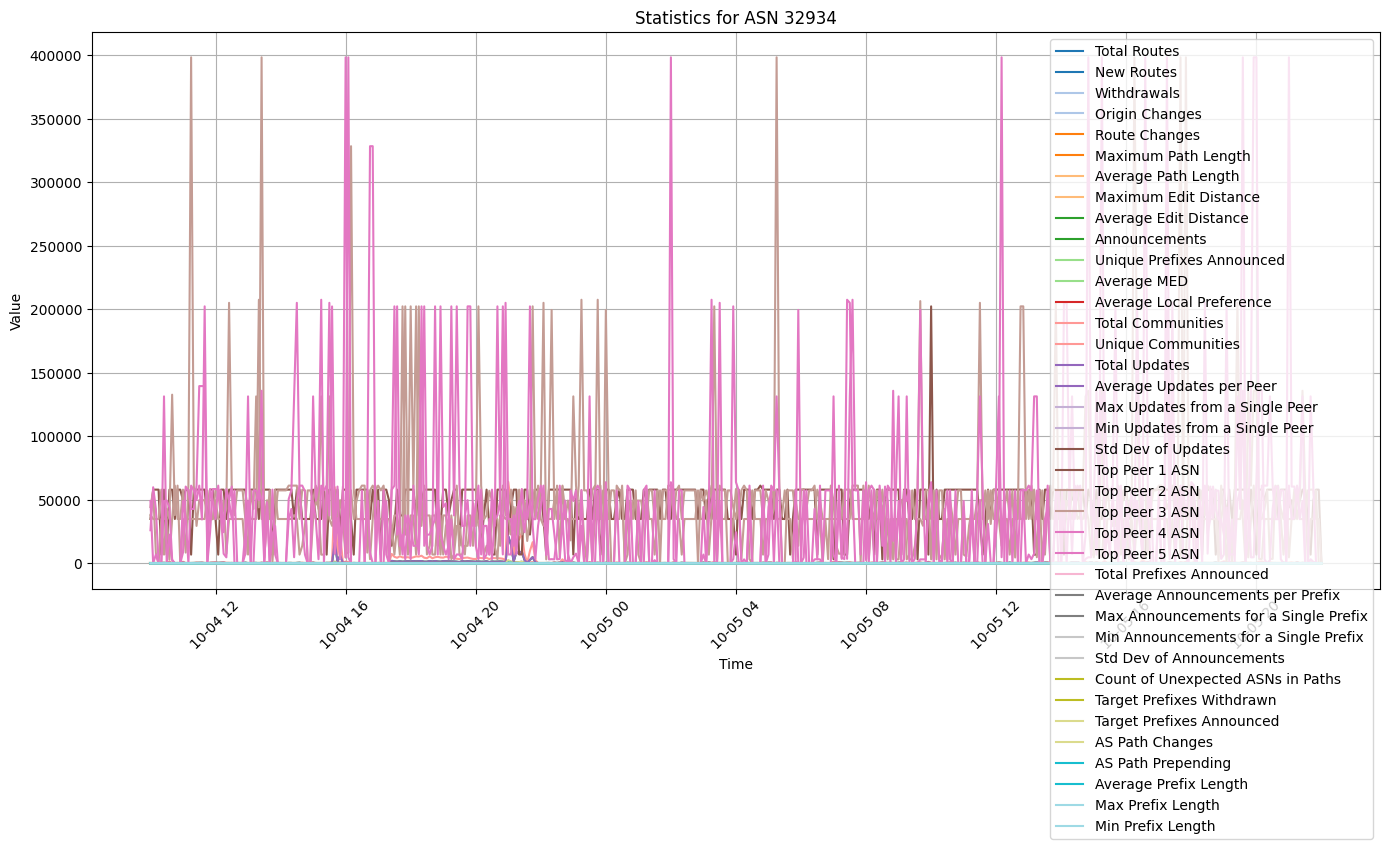

In [4]:
facebook_prefixes = set([
    "129.134.30.0/24",
    "129.134.30.0/23"
])

target_asn = "32934"
from_time = "2021-10-04 10:00:00"
until_time = "2021-10-05 22:00:00"
output_file = f'facebook_{target_asn}_anomaly_1004_allday.csv'

df_features = extract_bgp_data(
    from_time=from_time,
    until_time=until_time,
    target_asn=target_asn,
    target_prefixes=facebook_prefixes,
    output_file=output_file
)
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

# Google Leak

Starting data collection from 2017-08-25 00:00:00 to 2017-08-26 00:00:00 for collectors ['rrc00']
Total records processed: 5135458
Total elements processed: 12968844
Data saved to bgp_weighted_graph_asn_15169_google_leak.csv
Graph construction complete with 14 nodes and 16 edges.


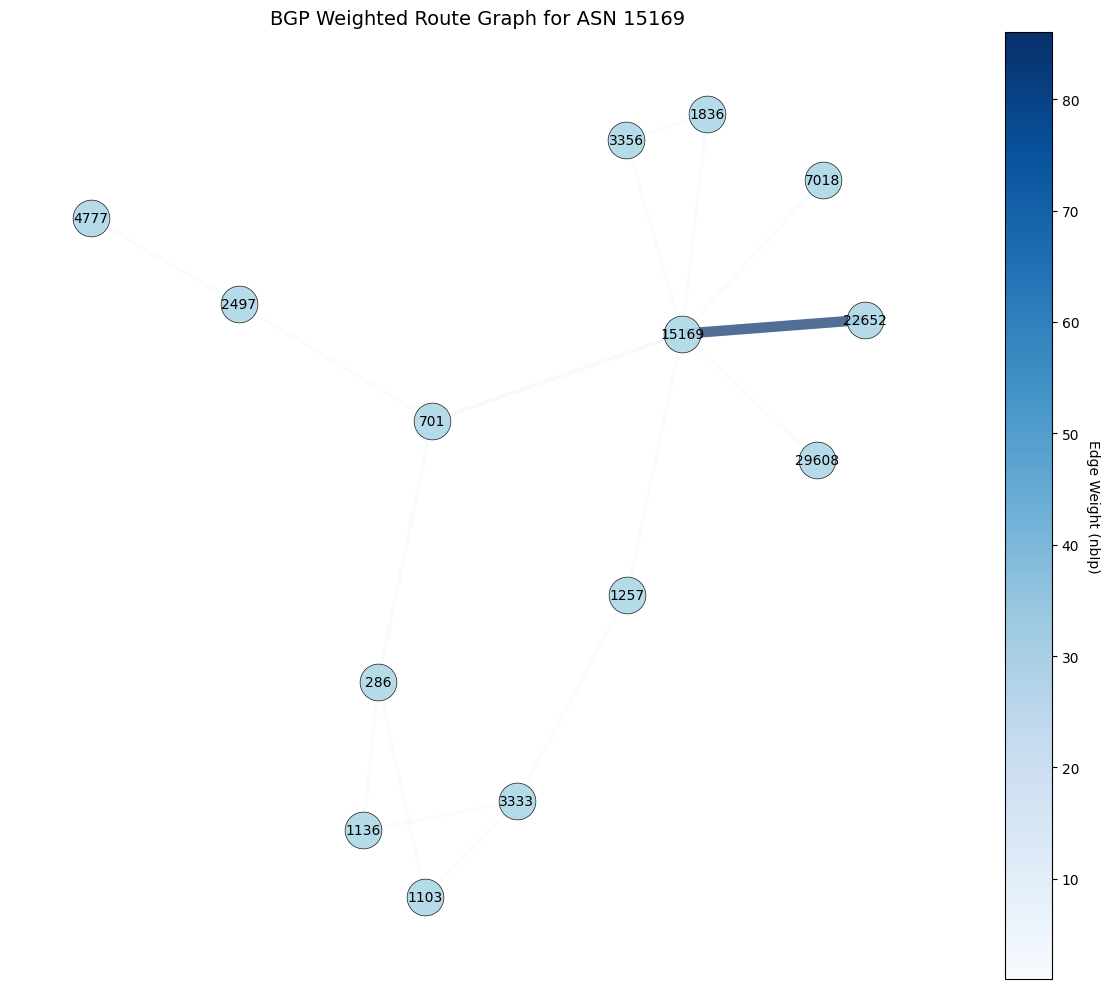

In [5]:
target_asn = "15169"  # Google's ASN
from_time = "2017-08-25 00:00:00"
until_time = "2017-08-26 00:00:00"
collectors = ["rrc00"]
output_file = f'bgp_weighted_graph_asn_{target_asn}_google_leak.csv'

G = extract_bgp_data_and_build_weighted_graph(target_asn, from_time, until_time, collectors, output_file)

plot_weighted_graph(G, title=f"BGP Weighted Route Graph for ASN {target_asn}")

INFO:bgp_data_generation:Starting BGP data extraction for ASN 15169 from 2017-08-25 02:00:00 to 2017-08-25 07:00:00
/home/hb/BGP_data_analysis/bgp_data_generation.py:689: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_features = pd.json_normalize(all_features, sep='_').fillna(0)
INFO:bgp_data_generation:             Timestamp Autonomous System Number  Total Routes  New Routes  \
0  2017-08-25 02:20:00                    15169             1           1   
1  2017-08-25 02:25:00                    15169             1           0   
2  2017-08-25 02:55:00                    15169             1           0   
3  2017-08-25 03:20:00                    15169         73392       73392   
4  2017-08-25 03:25:00                    15169         66006       39403   
5  2017-08-

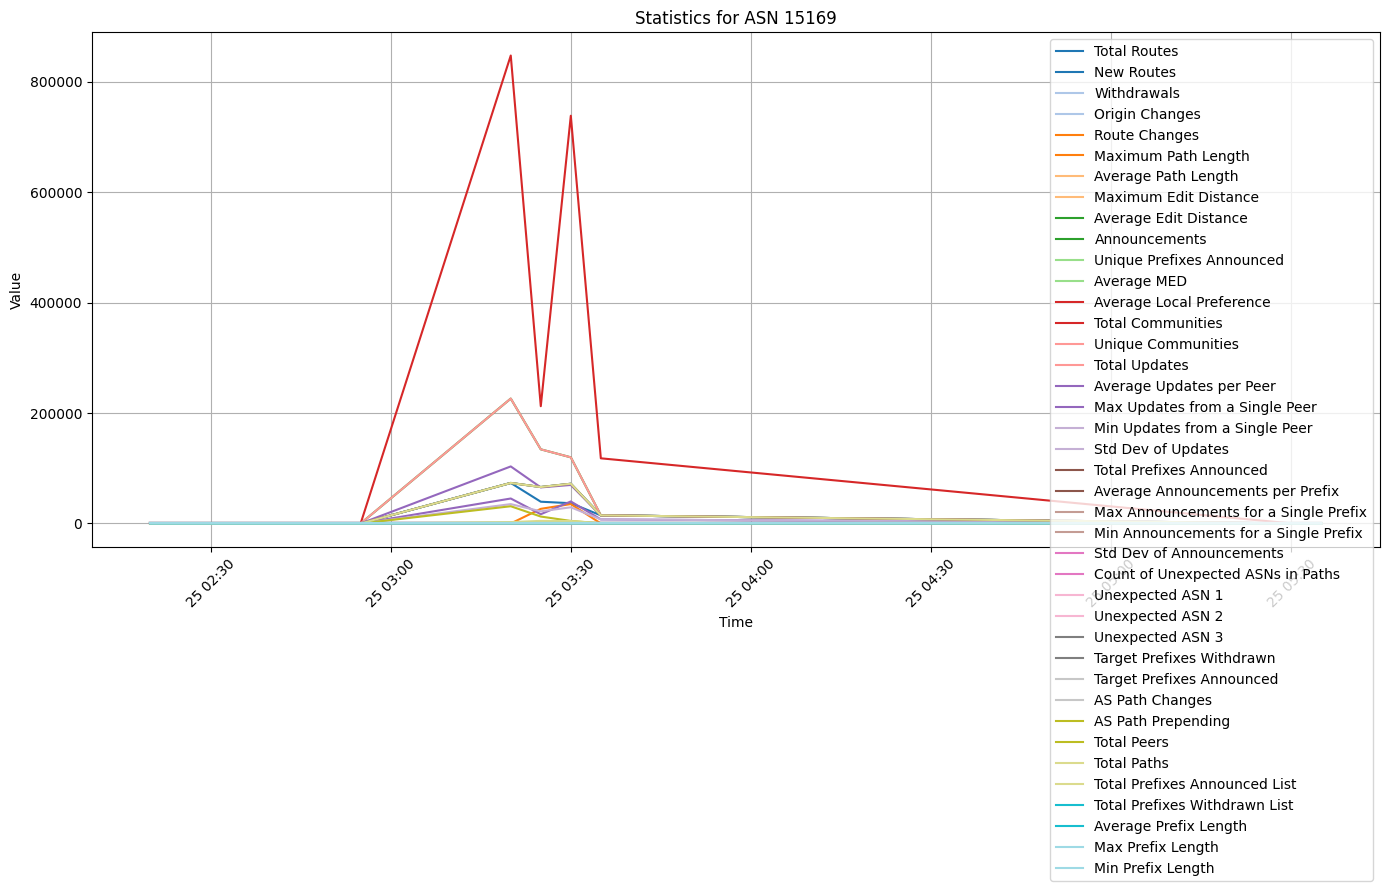

In [4]:
target_asn = "15169"
# target_asn = "37282"
# target_asn = "4809"

from_time="2017-08-25 02:00:00"
until_time="2017-08-25 07:00:00"
collectors = ["rrc00"]
output_file = f'bgp_features_asn_{target_asn}_google_leak.csv'

df_features = extract_bgp_data(from_time=from_time, 
                               until_time=until_time, 
                               target_asn=target_asn, 
                               target_prefixes=None,
                               output_file=output_file
                               )
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

In [ ]:
from datetime import datetime, timedelta
import pandas as pd

df_features = pd.read_csv('/home/hb/dataset_bgp/bgp_tab_dataset/bgp_features_asn_15169_google_leak_with_labels.csv')
df_features = df_features.drop(columns=['anomaly_status'])

# Calculate the difference between consecutive rows
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

# Detect anomalies
df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)
print(df_features)

df_features.to_csv(f'bgp_features_asn_15169_google_leak_with_labels.csv', index=False)

# April 2018: 1300 IP addresses within Amazon Web Services space were hijacked by eNet
eNET (AS10297)
Hurricane Electric (AS6939)

In [19]:
target_asn = "6939"
# target_asn = "10297"
from_time="2018-04-25 10:00:00"
until_time="2018-04-25 13:00:00"
collectors = ["rrc00", "rrc06"]
output_file = f'bgp_features_asn_{target_asn}_amazone_hijack.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

             timestamp   asn  num_routes  num_new_routes  num_withdrawals  \
0  2018-04-25 10:00:00  6939           0               0                0   
1  2018-04-25 10:05:00  6939           0               0                0   
2  2018-04-25 10:10:00  6939           0               0                0   
3  2018-04-25 10:15:00  6939           0               0                0   
4  2018-04-25 10:20:00  6939           0               0                0   
5  2018-04-25 10:25:00  6939           0               0                0   
6  2018-04-25 10:30:00  6939           0               0                0   
7  2018-04-25 10:35:00  6939           0               0                0   
8  2018-04-25 10:40:00  6939           0               0                0   
9  2018-04-25 10:45:00  6939           0               0                0   
10 2018-04-25 10:50:00  6939           0               0                0   
11 2018-04-25 10:55:00  6939           0               0                0   

/tmp/ipykernel_211634/1777972919.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab20', num_colors)


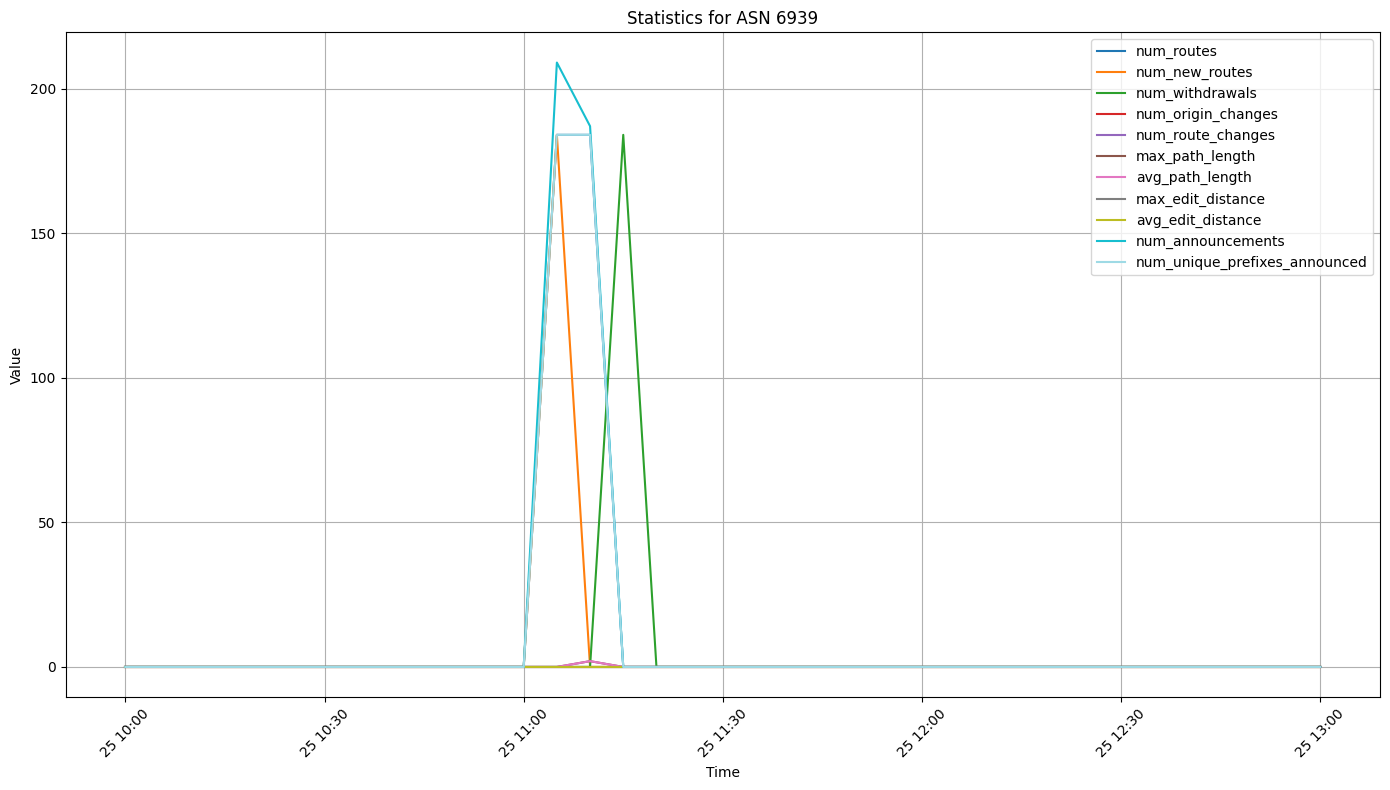

In [20]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

# Define the color map
num_colors = len(numeric_cols)
color_map = cm.get_cmap('tab20', num_colors)

plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_cols):
    plt.plot(df_features['Timestamp'], df_features[col], label=col, color=color_map(i))

plt.xlabel('Time')
plt.ylabel('Value')
plt.title(f'Statistics for ASN {target_asn}')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd

# target_asn = "10297"
target_asn = "6939"

df_features = pd.read_csv('/home/hb/dataset_bgp/bgp_tab_dataset/bgp_features_asn_6939_with_labels.csv')
df_features = df_features.drop(columns=['anomaly_status'])
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)

df_features.to_csv(f'bgp_features_asn_{target_asn}_amazon_with_labels.csv', index=False)

# Traffic for Google, Apple, Facebook, Microsoft and other tech giants routed through Russia

Origin AS of 39523

In [ ]:
target_asn = "39523"
from_time="2017-12-12 00:00:00"
until_time="2017-12-13 00:00:00"
collectors = ["rrc00"]
output_file = f'bgp_features_asn_{target_asn}_russian_hijack.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)

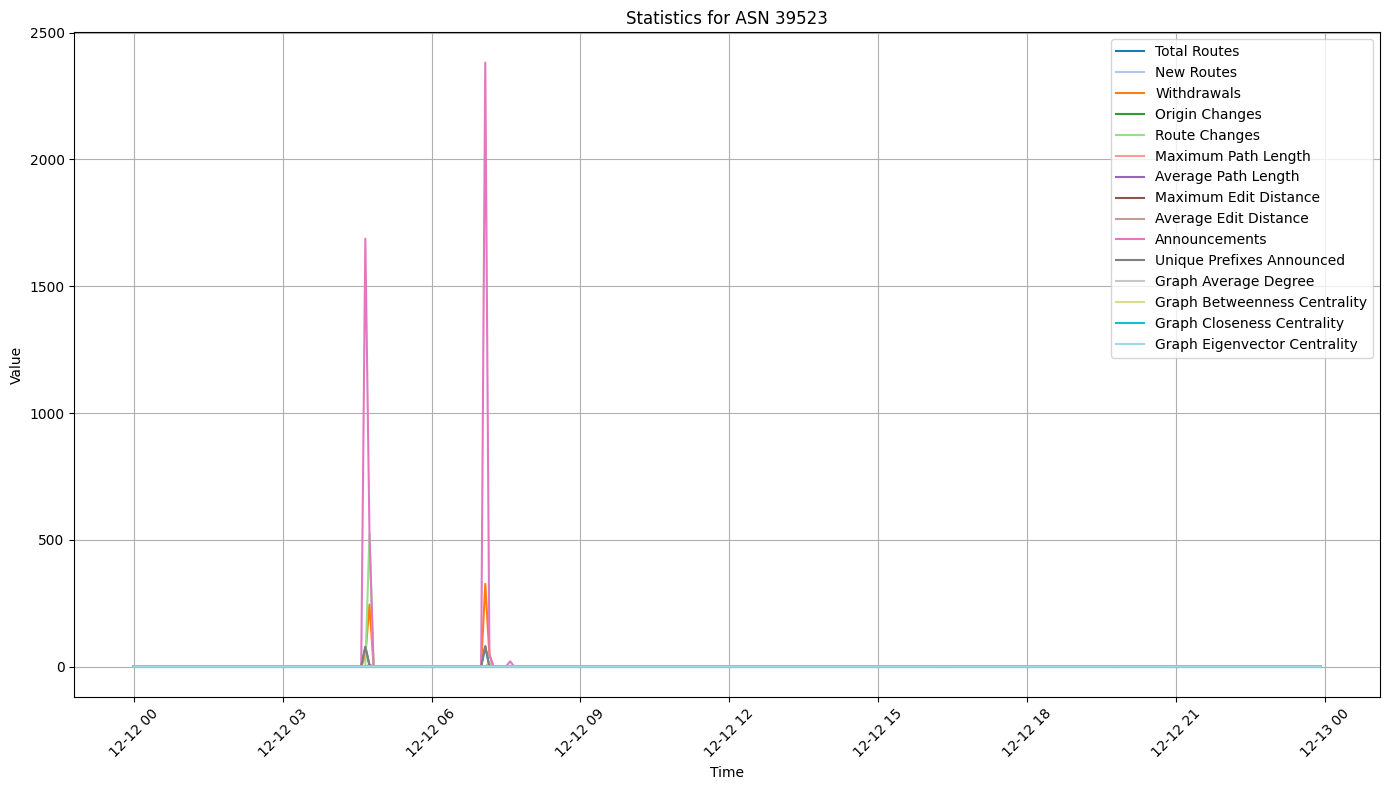

In [4]:
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

# April 8, 2010 Chinese ISP hijacks the Internet
AS23724

1727066889 HTTP ERROR: Couldn't connect to server (7)
2024-09-23 13:48:09 260475: bs_transport_file.c:39: ERROR: Could not open http://data.ris.ripe.net/rrc00/2010.04/updates.20100412.0150.gz for reading
2024-09-23 13:48:09 260475: bgpstream_transport.c:97: ERROR: Could not open resource (http://data.ris.ripe.net/rrc00/2010.04/updates.20100412.0150.gz)
2024-09-23 13:48:09 260475: bgpstream_reader.c:169: WARNING: Could not open (http://data.ris.ripe.net/rrc00/2010.04/updates.20100412.0150.gz). Attempt 1 of 5


Total records processed: 3209454
Total elements processed: 8474728
Data saved to bgp_features_asn_23724_chinese_isp.csv


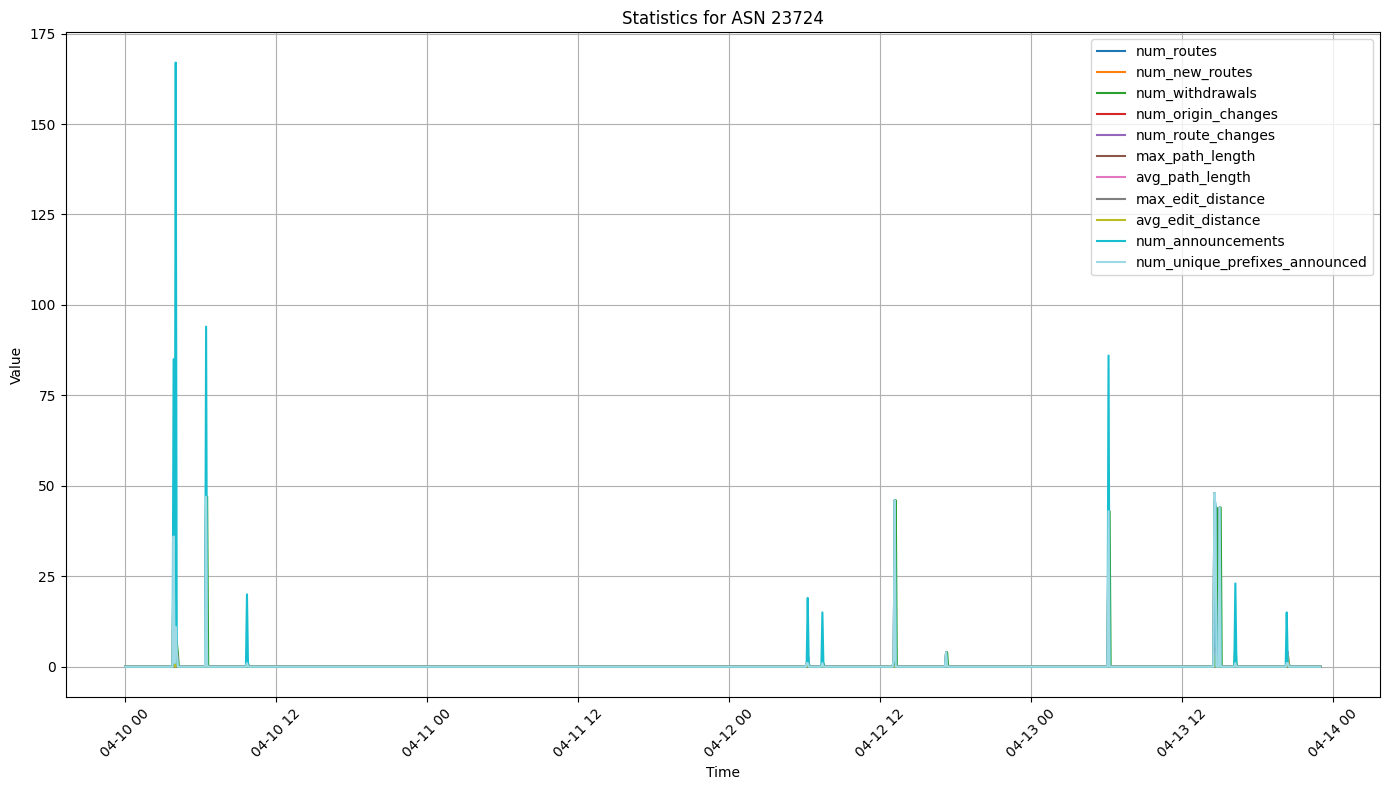

In [2]:
target_asn = "23724"
from_time = "2010-4-10 00:00:00"
until_time = "2010-4-13 23:00:00"
collectors = ["rrc00"]
output_file = f'bgp_features_asn_{target_asn}_chinese_isp.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

In [7]:
df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)
output_file = output_file.replace('.csv', '_with_labels.csv')
df_features.to_csv(output_file, index=False)

# ROS - Special Operations Group of the Italian National Military police

AS31034
(2013, 7, 3, 4, 0, 0)

Total records processed: 28906329
Total elements processed: 58800947
Data saved to bgp_features_asn_31034_ROS.csv


/tmp/ipykernel_489684/1722542296.py:180: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab20', num_colors)


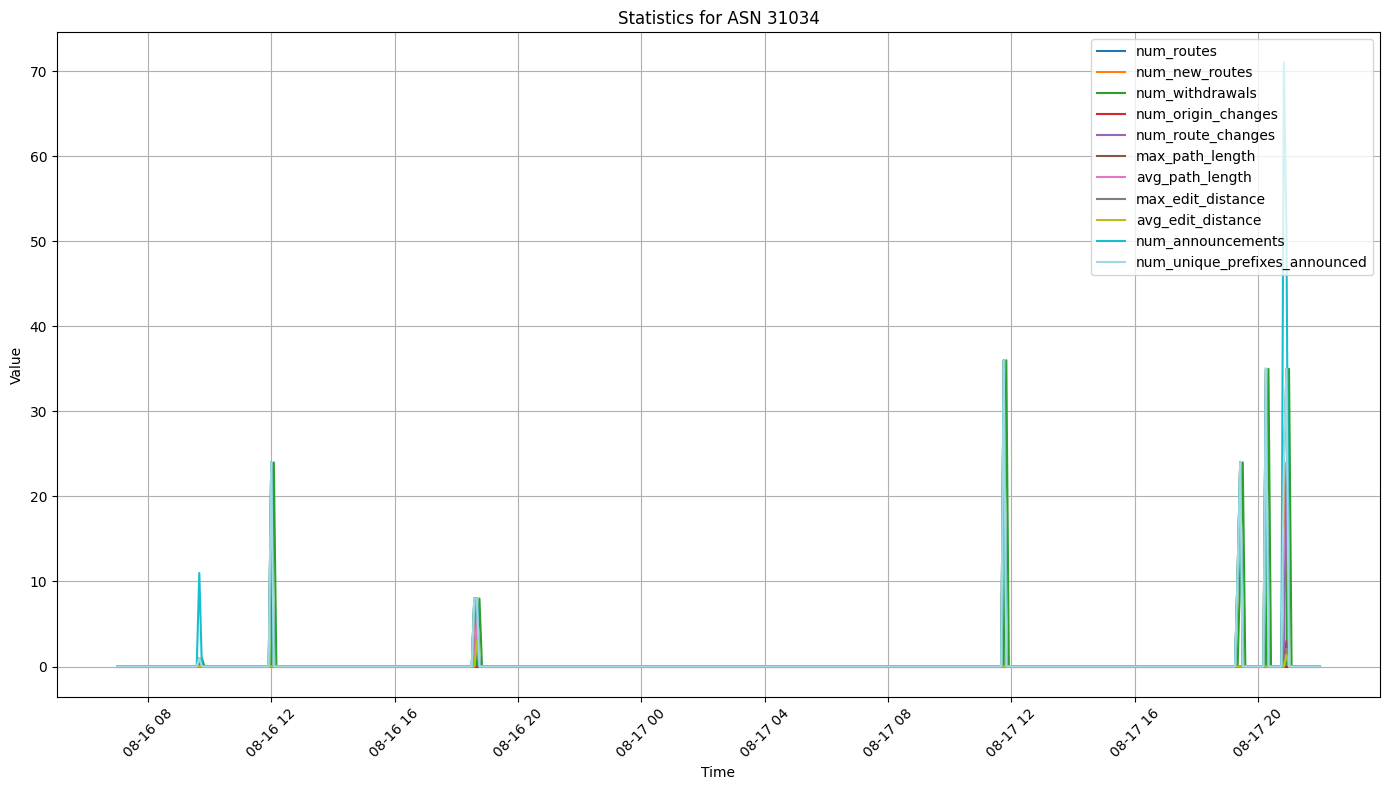

In [13]:
target_asn = "31034"
from_time = "2013-8-16 07:00:00"
until_time = "2013-8-17 22:00:00"
collectors = ["rrc00", "route-views2", "route-views3", "route-views4", "ris-ripe"]
output_file = f'bgp_features_asn_{target_asn}_ROS.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

In [ ]:
df_features = pd.read_csv("/home/hb/dataset_bgp/bgp_tab_dataset/bgp_features_asn_31034_ROS_with_labels.csv")
df_features = df_features.drop(columns=['anomaly_status'])
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)
print(df_features[['Timestamp', 'anomaly_status']])
df_features.to_csv(f'bgp_features_asn_31034_ROS_with_labels.csv', index=False)

# January 2017: Iranian pornography censorship
AS8529 - victim (receieved)
AS27589 - victim (hijacked)

Total records processed: 3814457
Total elements processed: 13286033
Data saved to bgp_features_asn_8529_iran.csv


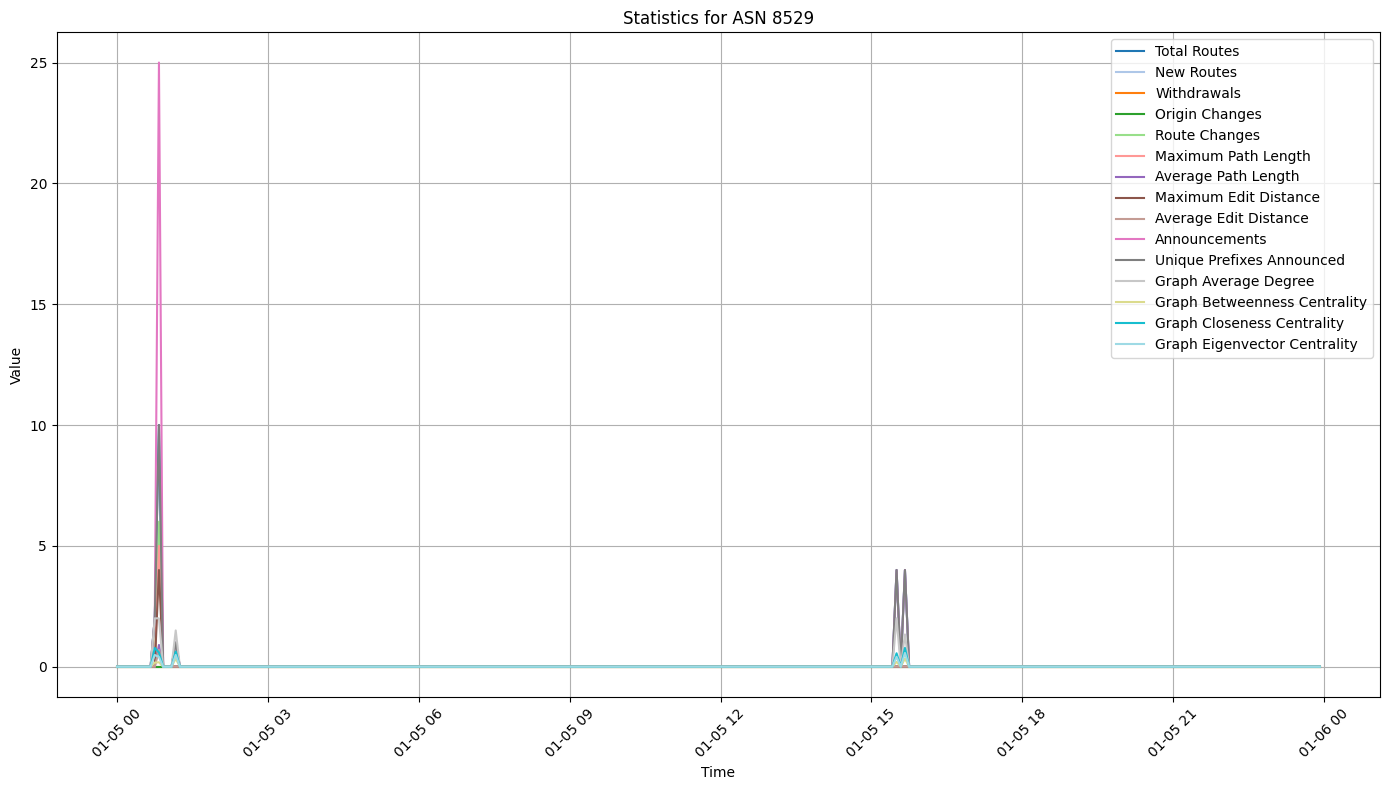

In [5]:
target_asn = "8529"
from_time = "2017-01-05 00:00:00"
until_time = "2017-01-06 00:00:00"
collectors = ["rrc00"]
output_file = f'bgp_features_asn_{target_asn}_iran.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

In [ ]:
df_features = pd.read_csv("/home/hb/dataset_bgp/bgp_tab_dataset/bgp_features_asn_8529_iran_with_labels.csv")
df_features = df_features.drop(columns=['anomaly_status'])
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)
df_features.to_csv(f'bgp_features_asn_8529_iran_with_labels.csv', index=False)

1718677613 HTTP ERROR: Timeout was reached (28)


Total records processed: 34096390
Total elements processed: 117298516
Data saved to bgp_features_asn_27589_iran.csv


/tmp/ipykernel_631538/3736920510.py:181: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab20', num_colors)


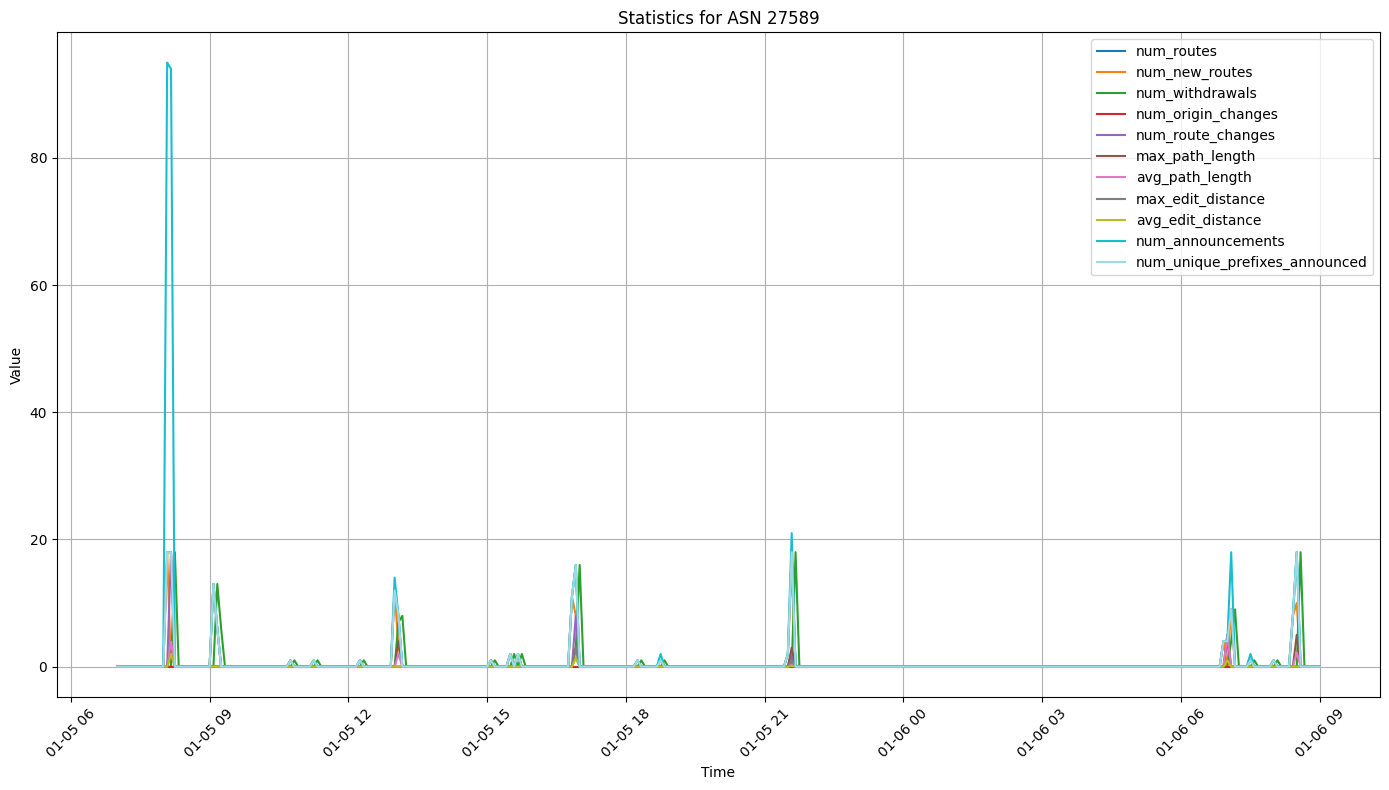

In [5]:
target_asn = "27589"
from_time = "2017-01-05 7:00:00"
until_time = "2017-01-06 9:00:00"
collectors = ["rrc00", "route-views2", "route-views3", "route-views4", "ris-ripe"]
output_file = f'bgp_features_asn_{target_asn}_iran.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

In [19]:
target_asn = "27589"
input_file = f'bgp_features_asn_{target_asn}_iran.csv'
df_features = pd.read_csv(input_file)
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)
output_file = input_file.replace('.csv', '_with_labels.csv')
df_features.to_csv(output_file, index=False)

# February 2021 Cablevision Mexico

Total records processed: 29819441
Total elements processed: 76510412
Data saved to bgp_features_asn_28548_mexico.csv


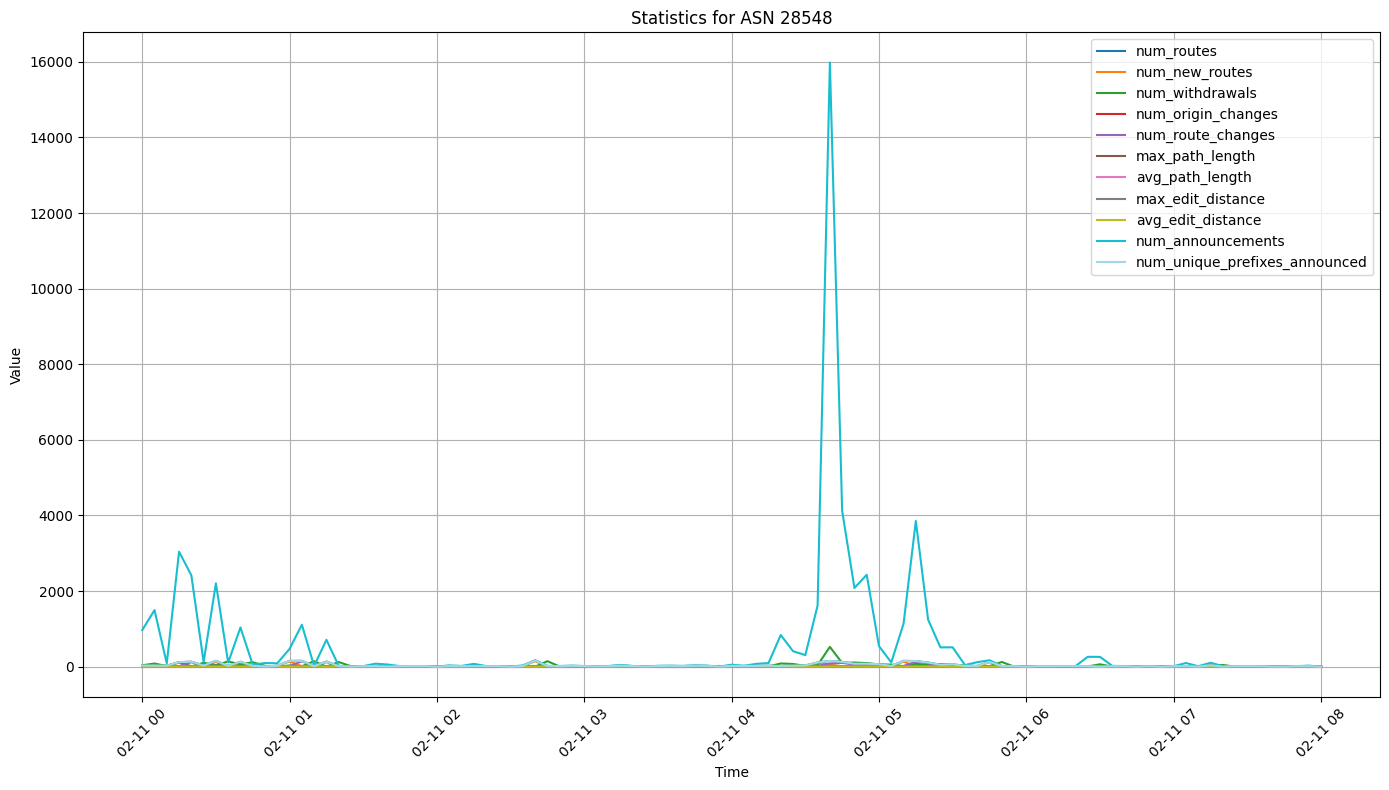

In [4]:
target_asn = "28548"
from_time = "2021-02-11 00:00:00"
until_time = "2021-02-11 08:00:00"
collectors = ["rrc00", "route-views.sg", "route-views.eqix"]
output_file = f'bgp_features_asn_{target_asn}_mexico.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

In [5]:
target_asn = "28548"
output_file = f'bgp_features_asn_{target_asn}_mexico.csv'
df_features = pd.read_csv(output_file)
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)
df_features.to_csv(f'{output_file}_with_labels.csv', index=False)

# November 2018: US-based China Telecom site originated Google addresses


1722590772 HTTP ERROR: Couldn't connect to server (7)
2024-08-02 18:26:12 410837: bs_transport_file.c:39: ERROR: Could not open http://data.ris.ripe.net/rrc00/2018.11/updates.20181112.1140.gz for reading
2024-08-02 18:26:12 410837: bgpstream_transport.c:97: ERROR: Could not open resource (http://data.ris.ripe.net/rrc00/2018.11/updates.20181112.1140.gz)
2024-08-02 18:26:12 410837: bgpstream_reader.c:169: WARNING: Could not open (http://data.ris.ripe.net/rrc00/2018.11/updates.20181112.1140.gz). Attempt 1 of 5


Total records processed: 41785145
Total elements processed: 119771335
Data saved to bgp_features_asn_4809_us_china_tel.csv


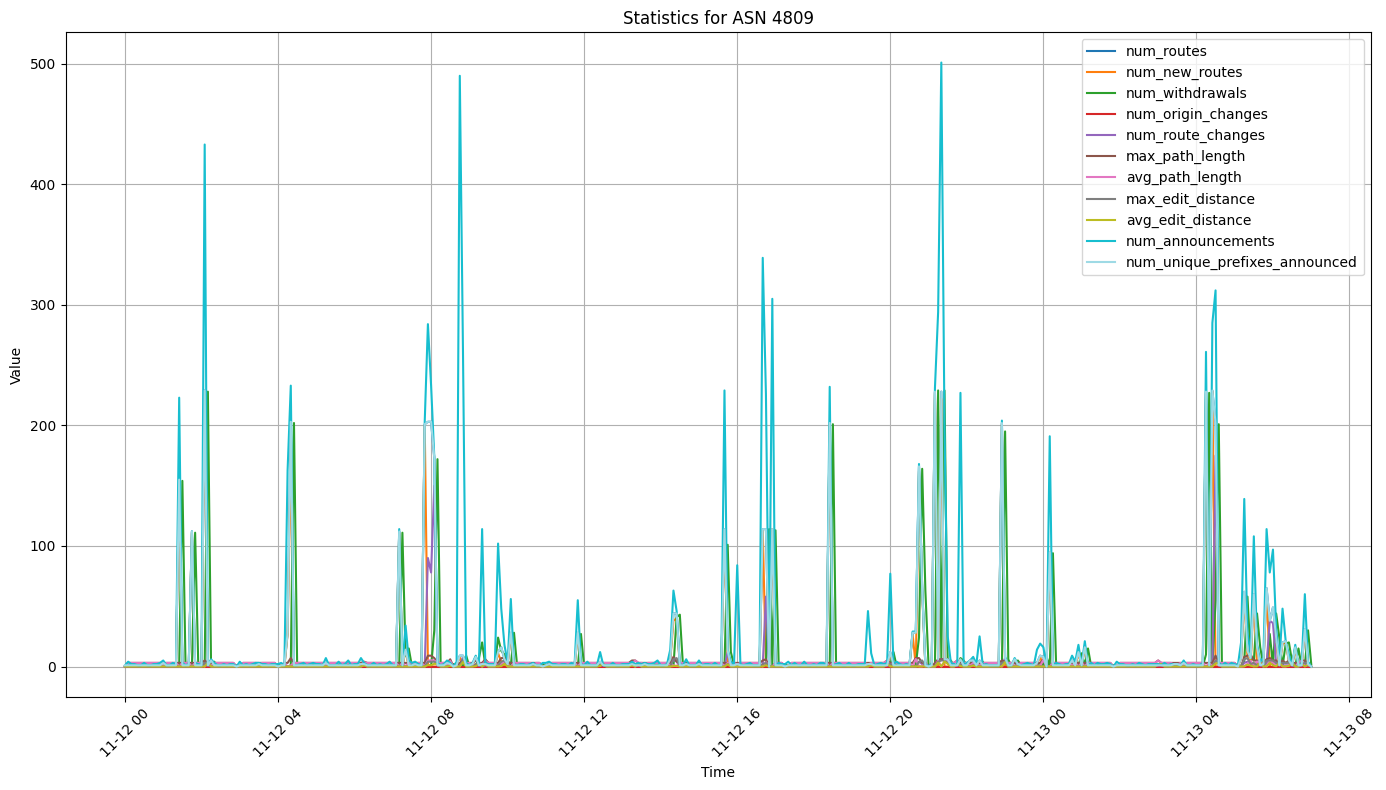

In [6]:
# suspicious_asns = {"20485", "4809", "37282"}
# target_asn = "20485"
target_asn = "4809"
from_time = "2018-11-12 00:00:00"
until_time = "2018-11-13 07:00:00"
collectors = ["rrc00", "route-views2", "route-views3", "route-views4", "ris-ripe"]
output_file = f'bgp_features_asn_{target_asn}_us_china_tel.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

In [3]:
target_asn = "4809"
input_file = f'bgp_features_asn_{target_asn}_us_china_tel.csv'
df_features = pd.read_csv(input_file)
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)
output_file = input_file.replace('.csv', '_with_labels.csv')
df_features.to_csv(output_file, index=False)

# 6 June 2019, European routing leak sends trraffic through China Telecom

1727144333 HTTP ERROR: Couldn't resolve host name (6)
2024-09-24 11:18:53 286787: bsdi_broker.c:965: ERROR: Could not open https://broker.bgpstream.caida.org/v2/data?collectors[]=rrc00&types[]=updates&intervals[]=1559520000,1559865600&dataAddedSince=1727144200&minInitialTime=1559763900 for reading
2024-09-24 11:18:53 286787: bsdi_broker.c:949: WARNING: WARN: Broker request failed, waiting 1s before retry


Total records processed: 63295281
Total elements processed: 176746122
Data saved to bgp_features_asn_4134_eu_leak.csv


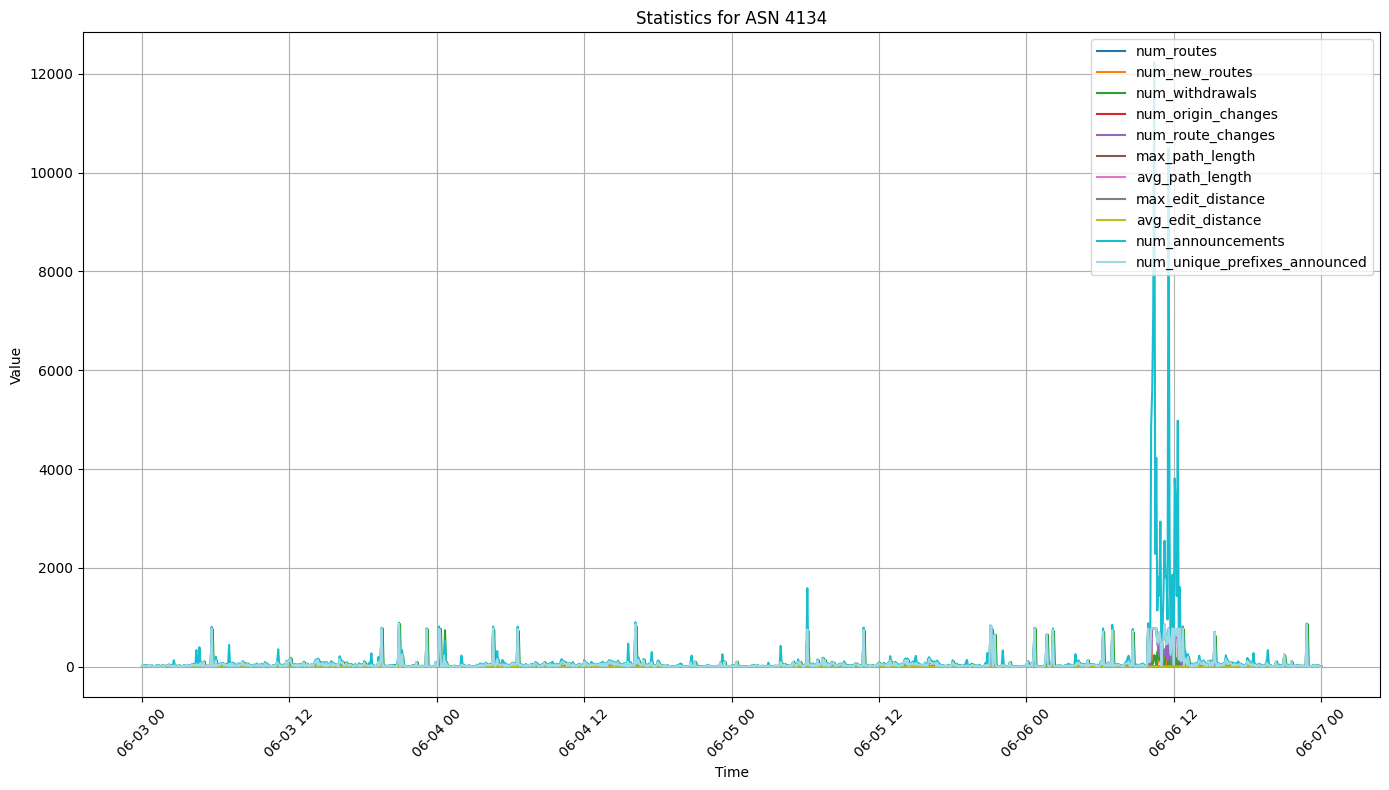

In [2]:
# Define the prefixes and AS paths involved in the incident
prefixes = {
    "46.145.0.0/16": "1136",  # KPN
    "46.14.128.0/17": "3303",  # Swisscom
    "176.171.75.0/24": "5410"  # Bouygues Telecom
    
}

target_asn = "4134" # China Telecom
from_time = "2019-06-03 00:00:00"
until_time = "2019-06-07 00:00:00"
collectors = ["rrc00"]
output_file = f'bgp_features_asn_{target_asn}_eu_leak.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

In [24]:
target_asn = "4134"
input_file = f'bgp_features_asn_{target_asn}_eu_leak.csv'
df_features = pd.read_csv(input_file)
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)
output_file = input_file.replace('.csv', '_with_labels.csv')
df_features.to_csv(output_file, index=False)

Total records processed: 31785304
Total elements processed: 99622717
Data saved to bgp_features_asn_1136_eu_leak.csv


/home/hb/BGP_data_analysis/bgp_data_generation.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


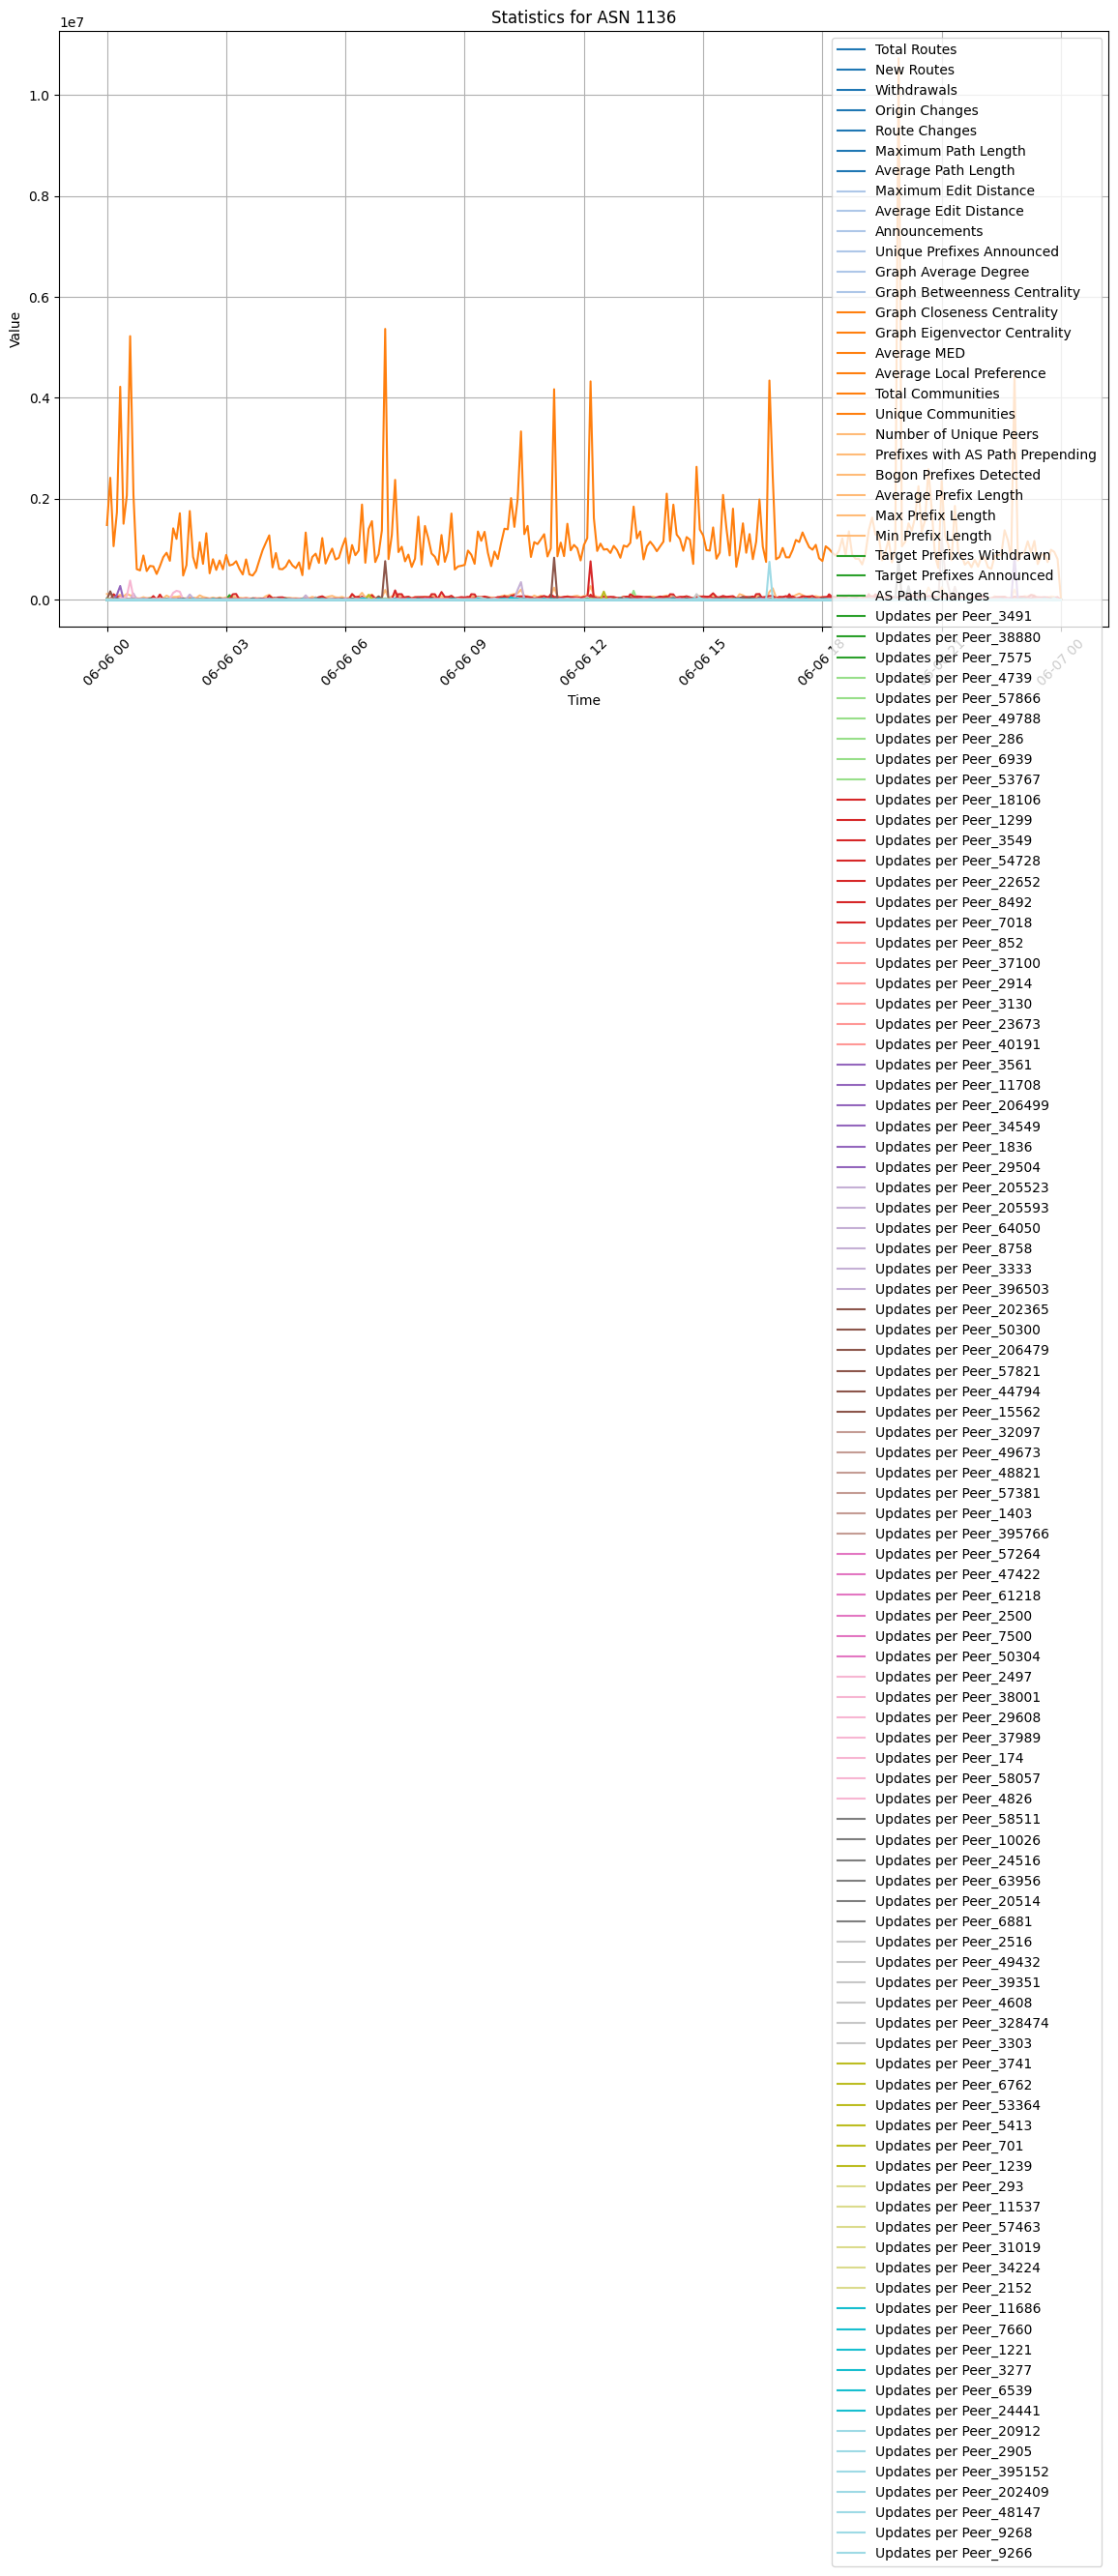

In [3]:
target_asn = "1136"
from_time = "2019-06-06 00:00:00"
until_time = "2019-06-07 00:00:00"
collectors = ["rrc00"]
output_file = f'bgp_features_asn_{target_asn}_eu_leak.csv'

df_features = extract_bgp_data(from_time=from_time, until_time=until_time, target_asn=target_asn, output_file=output_file)
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

In [17]:
target_asn = "1136"
input_file = f'bgp_features_asn_{target_asn}_eu_leak.csv'
df_features = pd.read_csv(input_file)
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)
output_file = input_file.replace('.csv', '_with_labels.csv')
df_features.to_csv(output_file, index=False)

Total records processed: 22642732
Total elements processed: 72001998
Data saved to bgp_features_asn_3303_eu_leak.csv


/tmp/ipykernel_631538/3736920510.py:181: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab20', num_colors)


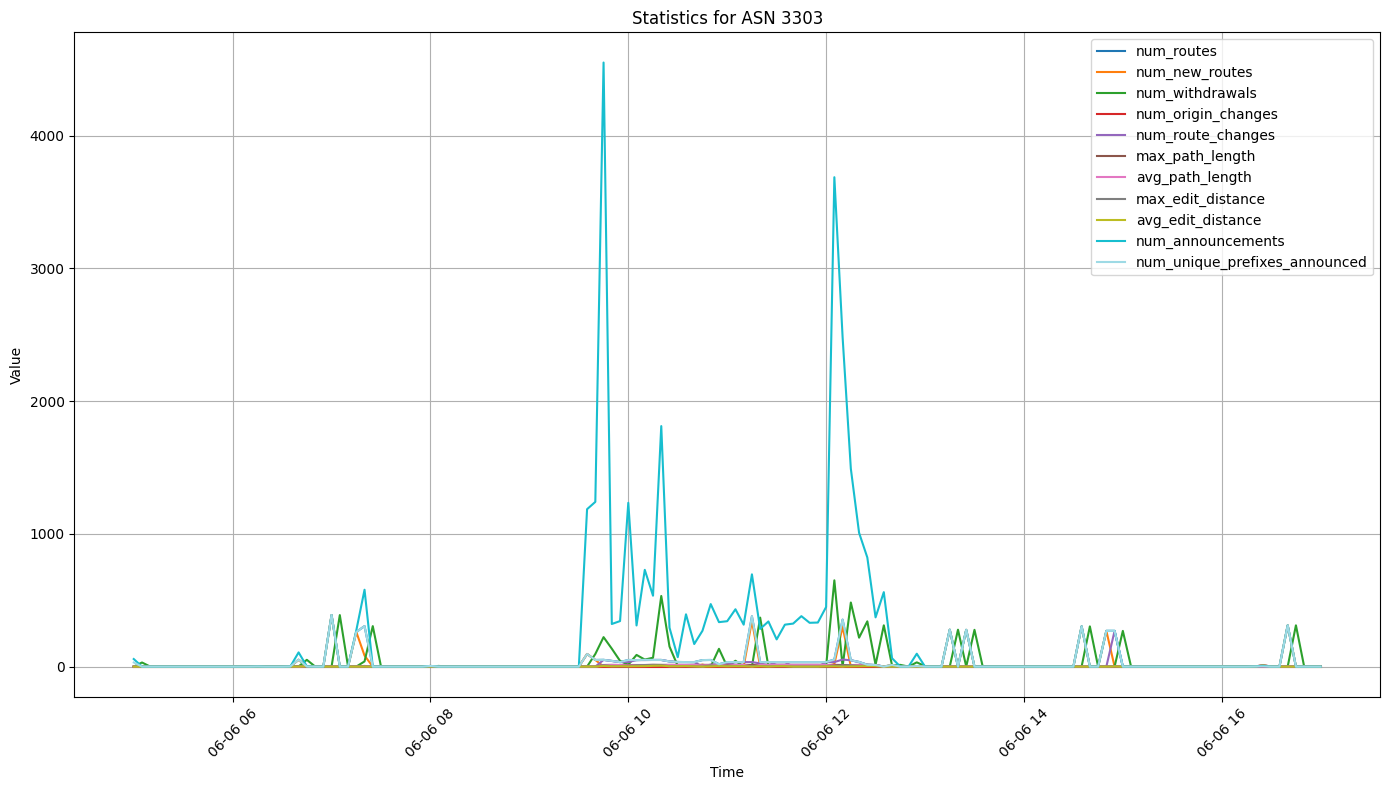

In [22]:
target_asn = "3303"
from_time = "2019-06-06 05:00:00"
until_time = "2019-06-06 17:00:00"
collectors = ["rrc00", "route-views2", "route-views3", "route-views4", "ris-ripe"]
output_file = f'bgp_features_asn_{target_asn}_eu_leak.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

In [25]:
target_asn = "3303"
input_file = f'bgp_features_asn_{target_asn}_eu_leak.csv'
df_features = pd.read_csv(input_file)
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)
output_file = input_file.replace('.csv', '_with_labels.csv')
df_features.to_csv(output_file, index=False)

# January 22, 2006: Con Edison Communications hijacks big chunk of the Internet

2024-06-18 14:56:48 631538: bgpstream_parsebgp_common.c:587: WARNING: Read truncated record 9861 from 'http://archive.routeviews.org/bgpdata/2006.01/UPDATES/updates.20060122.0028.bz2'
2024-06-18 14:56:48 631538: bgpstream_parsebgp_common.c:587: WARNING: Read truncated record 17214 from 'http://archive.routeviews.org/bgpdata/2006.01/UPDATES/updates.20060122.0028.bz2'
2024-06-18 14:57:26 631538: bgpstream_parsebgp_common.c:587: WARNING: Read truncated record 8441 from 'http://archive.routeviews.org/bgpdata/2006.01/UPDATES/updates.20060122.0304.bz2'
2024-06-18 14:57:27 631538: bgpstream_parsebgp_common.c:587: WARNING: Read truncated record 27786 from 'http://archive.routeviews.org/bgpdata/2006.01/UPDATES/updates.20060122.0304.bz2'
2024-06-18 14:57:28 631538: bgpstream_parsebgp_common.c:587: WARNING: Read truncated record 31673 from 'http://archive.routeviews.org/bgpdata/2006.01/UPDATES/updates.20060122.0304.bz2'
2024-06-18 14:57:29 631538: bgpstream_parsebgp_common.c:587: WARNING: Read tr

Total records processed: 2471297
Total elements processed: 6929160
Data saved to bgp_features_asn_27506_ConEdison_hijack.csv


/tmp/ipykernel_631538/3736920510.py:181: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab20', num_colors)


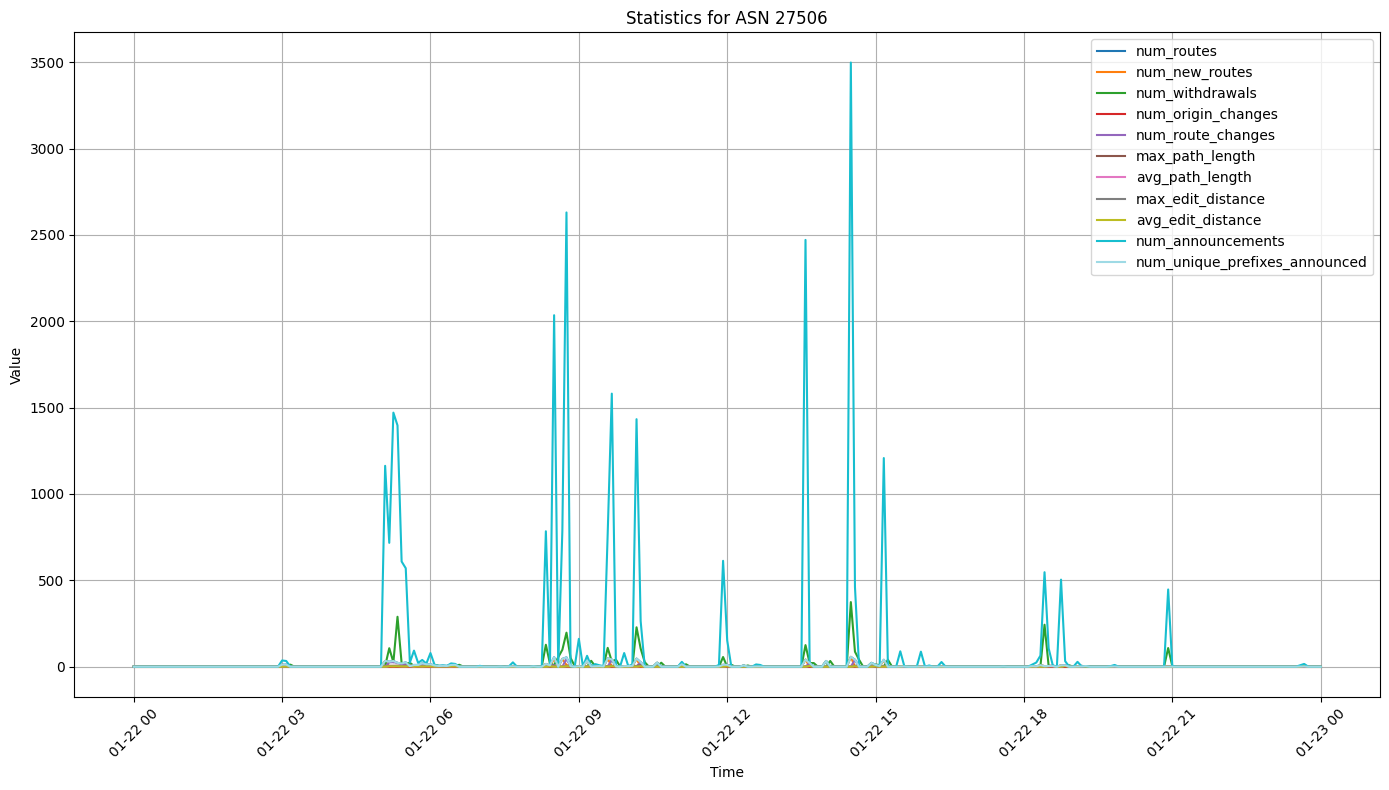

In [20]:
from_time = "2006-01-22 00:00:00"
until_time = "2006-01-23 00:00:00"
target_asn = "27506"
collectors = ["rrc00", "route-views2", "route-views3", "route-views4", "ris-ripe"]
output_file = f'bgp_features_asn_{target_asn}_ConEdison_hijack.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

In [ ]:
target_asn = "27506"
input_file = f'bgp_features_asn_{target_asn}_ConEdison_hijack.csv'
df_features = pd.read_csv(input_file)
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)
output_file = input_file.replace('.csv', '_with_labels.csv')
df_features.to_csv(output_file, index=False)

# July 2018: Iran Telecommunication Company (AS58224) originated 10 prefixes of Telegram Messenger.

In [ ]:
from_time = "2018-07-29 20:00:00"
until_time = "2018-07-30 22:00:00"
target_asn = "58224"
collectors = ["rrc00", "route-views2", "route-views3", "route-views4", "ris-ripe"]
output_file = f'bgp_features_asn_{target_asn}_iran_telegram.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

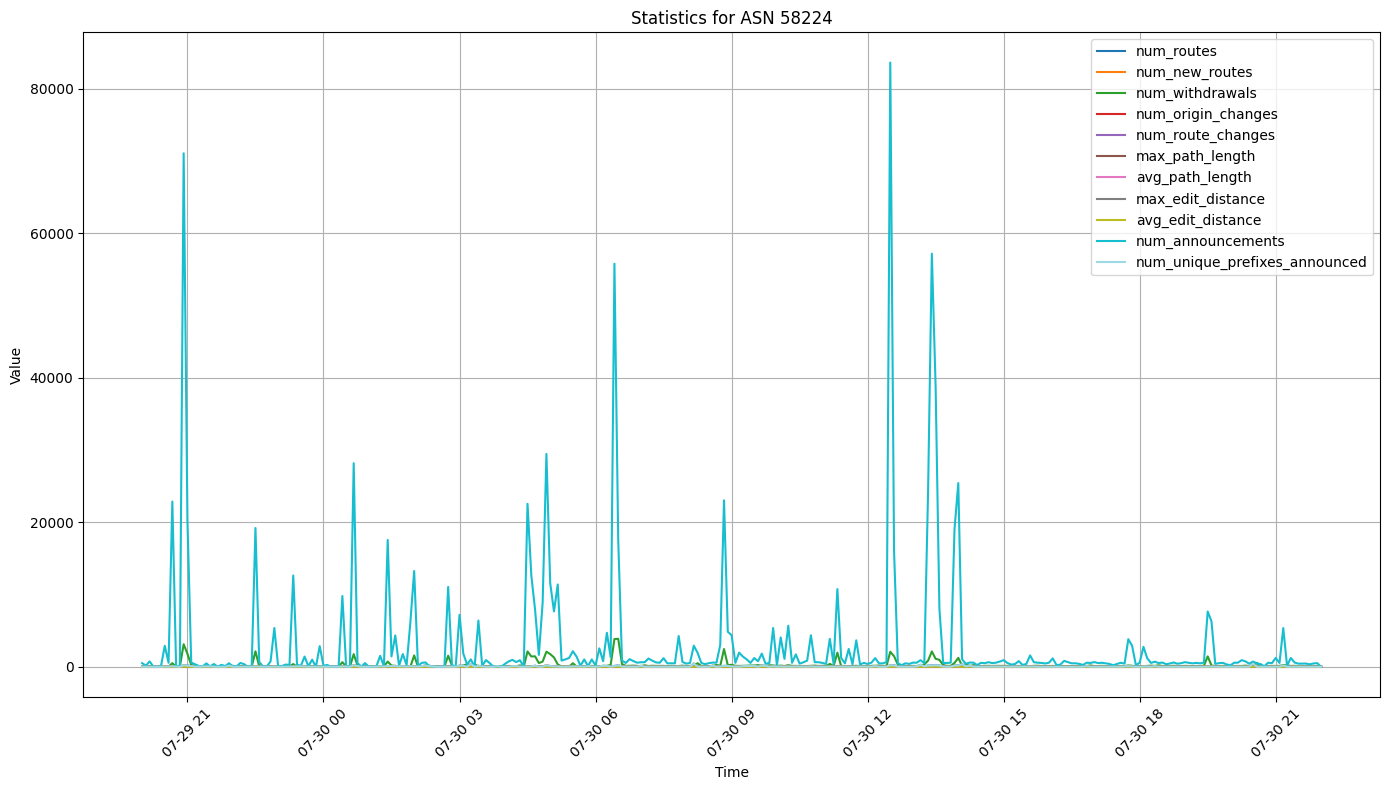

In [13]:
plot_statistics(df_features, target_asn)

In [14]:
target_asn = "58224"
input_file = f'bgp_features_asn_{target_asn}_iran_telegram.csv'
df_features = pd.read_csv(input_file)
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=1.5)
output_file = input_file.replace('.csv', '_with_labels.csv')
df_features.to_csv(output_file, index=False)

# On May 8 Public DNS in Taiwan the latest victim to BGP hijack -test?

Total records processed: 4577595
Total elements processed: 10985641
Data saved to bgp_features_asn_268869_dns_taiwan.csv


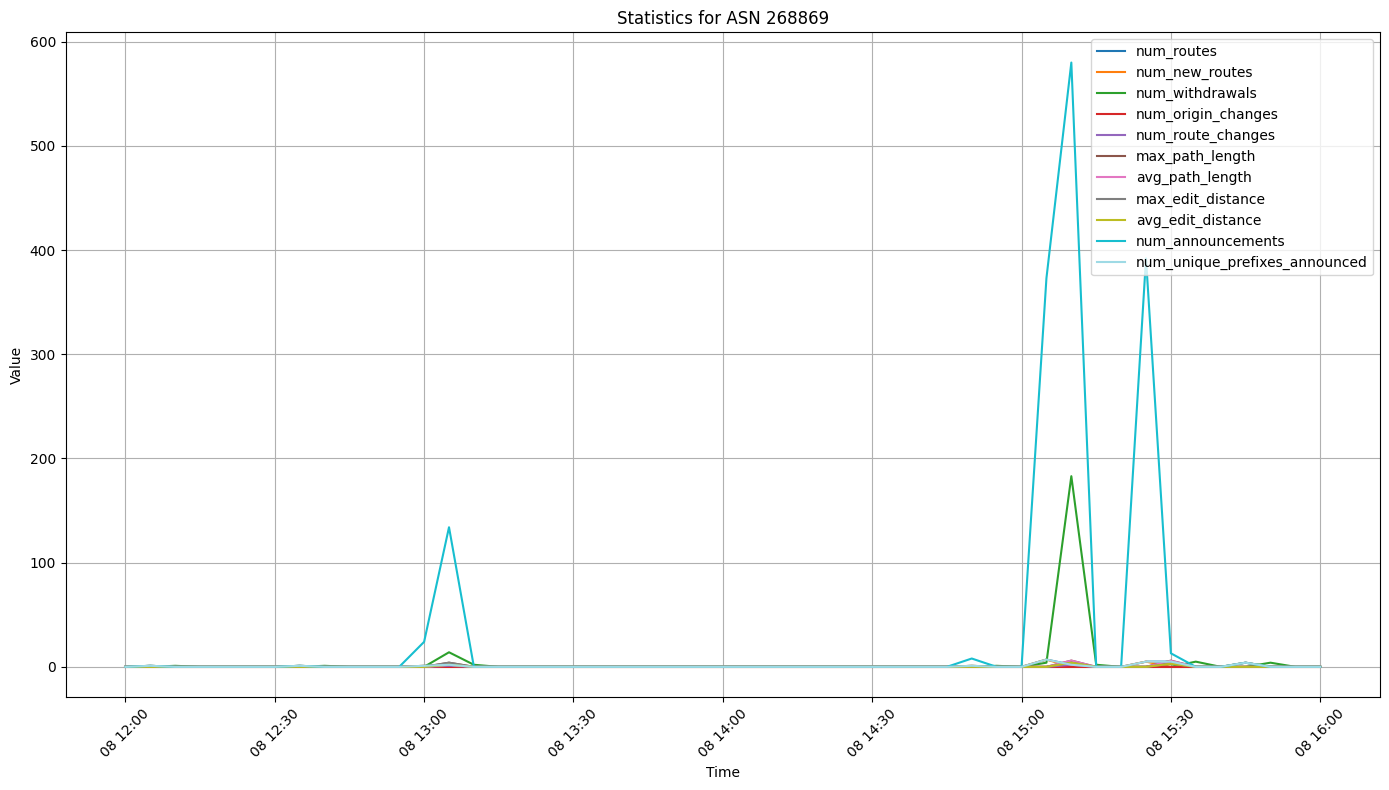

In [2]:
from_time = "2019-05-08 12:00:00"
until_time = "2019-05-08 16:00:00 "
target_asn = "268869"
collectors = ["rrc00", "route-views1.saopaulo", "route-views2.saopaulo"]
output_file = f'bgp_features_asn_{target_asn}_dns_taiwan.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

In [3]:
target_asn = "268869"
input_file = f'bgp_features_asn_{target_asn}_dns_taiwan.csv'
df_features = pd.read_csv(input_file)
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)
output_file = input_file.replace('.csv', '_with_labels.csv')
df_features.to_csv(output_file, index=False)

# BGP hijack of Twitter by Russian ISP

1723180728 HTTP ERROR: Failure when receiving data from the peer (56)
1723180975 HTTP ERROR: Failure when receiving data from the peer (56)
1723181720 HTTP ERROR: Failure when receiving data from the peer (56)
1723181721 HTTP ERROR: Failure when receiving data from the peer (56)
1723181833 HTTP ERROR: Failure when receiving data from the peer (56)
1723181837 HTTP ERROR: Failure when receiving data from the peer (56)


Total records processed: 27960182
Total elements processed: 73734751
Data saved to bgp_features_asn_8342_twitter.csv


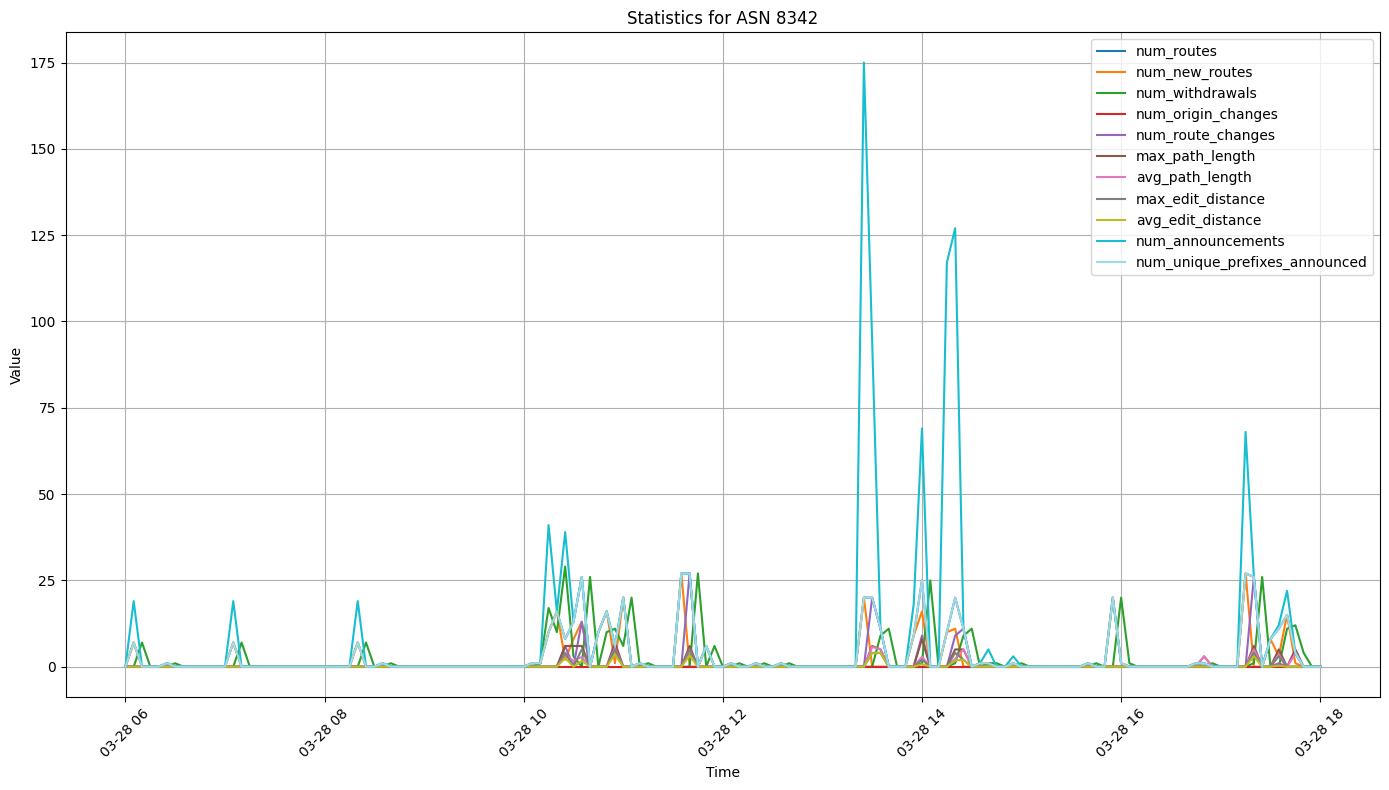

In [4]:
from_time = "2022-03-28 06:00:00"
until_time = "2022-03-28 18:00:00 "
target_asn = "8342"
collectors = ["rrc00", "route-views1.saopaulo", "route-views2.saopaulo"]
output_file = f'bgp_features_asn_{target_asn}_twitter.csv'

df_features = extract_bgp_data(target_asn, from_time, until_time, collectors, output_file)
df_features['Timestamp'] = pd.to_datetime(df_features['Timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns
plot_statistics(df_features, target_asn)

In [5]:
target_asn = "8342"
input_file = f'bgp_features_asn_{target_asn}_twitter.csv'
df_features = pd.read_csv(input_file)
df_features['Timestamp'] = pd.to_datetime(df_features['timestamp'])
numeric_cols = df_features.select_dtypes(include=['number']).columns

df_features = detect_anomalies(df_features, numeric_cols, threshold_multiplier=2)
input_file = input_file.replace('.csv', '_with_labels.csv')
df_features.to_csv(input_file, index=False)